In [1]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import numpy as np
import h5py

/home/ec2-user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_hdf5(infile):
    with h5py.File(infile,"r") as f:  #"with" close the file after its nested commands
        return f["image"][()]

def write_hdf5(arr,outfile):
    with h5py.File(outfile,"w") as f:
        f.create_dataset("image", data=arr, dtype=arr.dtype)


In [11]:
def imgs_to_array(img_dir, img_size, resize_method = 'idrid'):
    """
    img_dir: the directory path to the images
    img_size: the target image output size
    resize_method: different resize method designed specifically for different dataset
        - idrid: original data resolution:2848*4288, first trim it to 2848*2848, then resize
    """
    
    img_list = sorted(os.listdir(img_dir))
    n_imgs = len(img_list)
    imgs = np.zeros((n_imgs, img_size[0], img_size[1], 3))

    for i, img_path in enumerate(img_list):
        if i % 20 == 0:
            print("images loaded:" , str(i))
        path = img_dir + img_path
        img = imread(path)
        if resize_method == 'idrid':
            img = img[:,540:3388,:]
            img = resize(img, img_size)
        imgs[i] = img
        
    return imgs
        
def center_to_array(center_dir, img_size, resize_method = 'idrid'):
    """
    center_dir: .csv file, representing the center of the images
    img_size: the target image output by the original images
    resize_method: different resize method designed specifically for different dataset, 
                   should be the same as "imgs_to_array" function 
    """
    
    center = pd.read_csv(center_dir)
    center = center.dropna(how='all')
    if resize_method == 'idrid':
        center.iloc[:,1] = center.iloc[:,1] - 540
        center.iloc[:,1] = center.iloc[:,1]*(int(img_size[0])/2848)
        center.iloc[:,2] = center.iloc[:,2]*(int(img_size[1])/2848)
    
    return center.iloc[:,1:3].values
    
def show_img(img, center = None):
    """
    show the imgs
    imgs: the imgs array
    center: tuple, representing the position of the optic disc center
    """
    plt.figure()
    plt.imshow(img)
    plt.scatter(center[0], center[1], s=50, c='red', marker='o')
    plt.show()

In [4]:
img_size = (480,480)
# Localization Test Data
img_dir = "/home/ec2-user/data/IDRiD/Localization/Original_Images/Testing_Set/"
loc_test_imgs = imgs_to_array(img_dir, img_size)

loc_test_center_path = "/home/ec2-user/data/IDRiD/Localization/Groundtruths/OpticDiscCenterLocation/IDRiD_OD_Center_Testing Set_Markups.csv"
loc_test_center = center_to_array(loc_test_center_path, img_size)

# Localization Training Data
img_dir = "/home/ec2-user/data/IDRiD/Localization/Original_Images/Training_Set/"
loc_train_imgs = imgs_to_array(img_dir, img_size)

loc_train_center_path = "/home/ec2-user/data/IDRiD/Localization/Groundtruths/OpticDiscCenterLocation/IDRiD_OD_Center_Training Set_Markups.csv"
loc_train_center = center_to_array(loc_train_center_path, img_size)

images loaded: 0


/home/ec2-user/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


images loaded: 20
images loaded: 40
images loaded: 60
images loaded: 80
images loaded: 100
images loaded: 0


/home/ec2-user/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


images loaded: 20
images loaded: 40
images loaded: 60
images loaded: 80
images loaded: 100
images loaded: 120
images loaded: 140
images loaded: 160
images loaded: 180
images loaded: 200
images loaded: 220
images loaded: 240
images loaded: 260
images loaded: 280
images loaded: 300
images loaded: 320
images loaded: 340
images loaded: 360
images loaded: 380
images loaded: 400


NameError: name 'img' is not defined

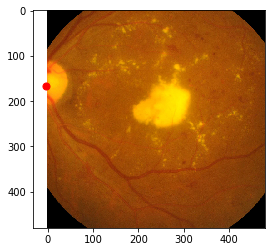

In [30]:
i = random.randint(0,100)
show_img(loc_train_imgs[223], loc_train_center[223])

# Save it to hdf5 file

In [33]:
data_path = "/home/ec2-user/data/IDRiD/hdf5/"
if not os.path.exists(data_path):
    os.mkdir(data_path)

write_hdf5(loc_train_imgs, data_path + "loc_train_imgs")
write_hdf5(loc_test_imgs, data_path + "loc_test_imgs")
write_hdf5(loc_train_center, data_path + "loc_train_center")
write_hdf5(loc_test_center, data_path + "loc_test_center")